In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from glob import glob

In [2]:
# function to read a csv that returns a dataframe with the content of the given csv. The file is searched into the csv/ directory
def read_csv(filename):
    # try to find csv file into subdirectory. If there are many, pick the newest
    files_found = glob(pathname="csv/"+filename)
    if len(files_found) == 0:
        # if not found then we are in the notebook dir and we need to go one level above
        files_found = glob(pathname="../csv/"+filename)

    files_found.sort(key=os.path.getmtime)
    path = files_found[-1]

    print("Reading file", path)
    df = pd.read_csv(path)
    return df

In [3]:
df_throughput = read_csv("throughput-*.csv")
df_throughput.describe()

Reading file ../csv/throughput-4-500.csv


,throughput,time,numworkers,streamsize
count,494.000000,494.000000,494.0,494.0
mean,0.221245,1596.060729,4.0,500.0
std,0.138515,965.246461,0.0,0.0
min,0.031250,21.000000,4.0,500.0
25%,0.127046,833.000000,4.0,500.0
50%,0.153326,1721.000000,4.0,500.0
75%,0.288555,2289.000000,4.0,500.0
max,0.492308,3242.000000,4.0,500.0


In [4]:
df_throughput_pts = read_csv("throughput_points-*.csv")
df_throughput_pts.describe()

Reading file ../csv/throughput_points-4-500.csv


,throughput,time,numworkers,streamsize
count,499.000000,499.000000,499.0,499.0
mean,0.222535,1580.208417,4.0,500.0
std,0.139923,973.254471,0.0,0.0
min,0.031250,10.000000,4.0,500.0
25%,0.125000,809.000000,4.0,500.0
50%,0.153571,1705.000000,4.0,500.0
75%,0.294529,2289.000000,4.0,500.0
max,0.500000,3242.000000,4.0,500.0


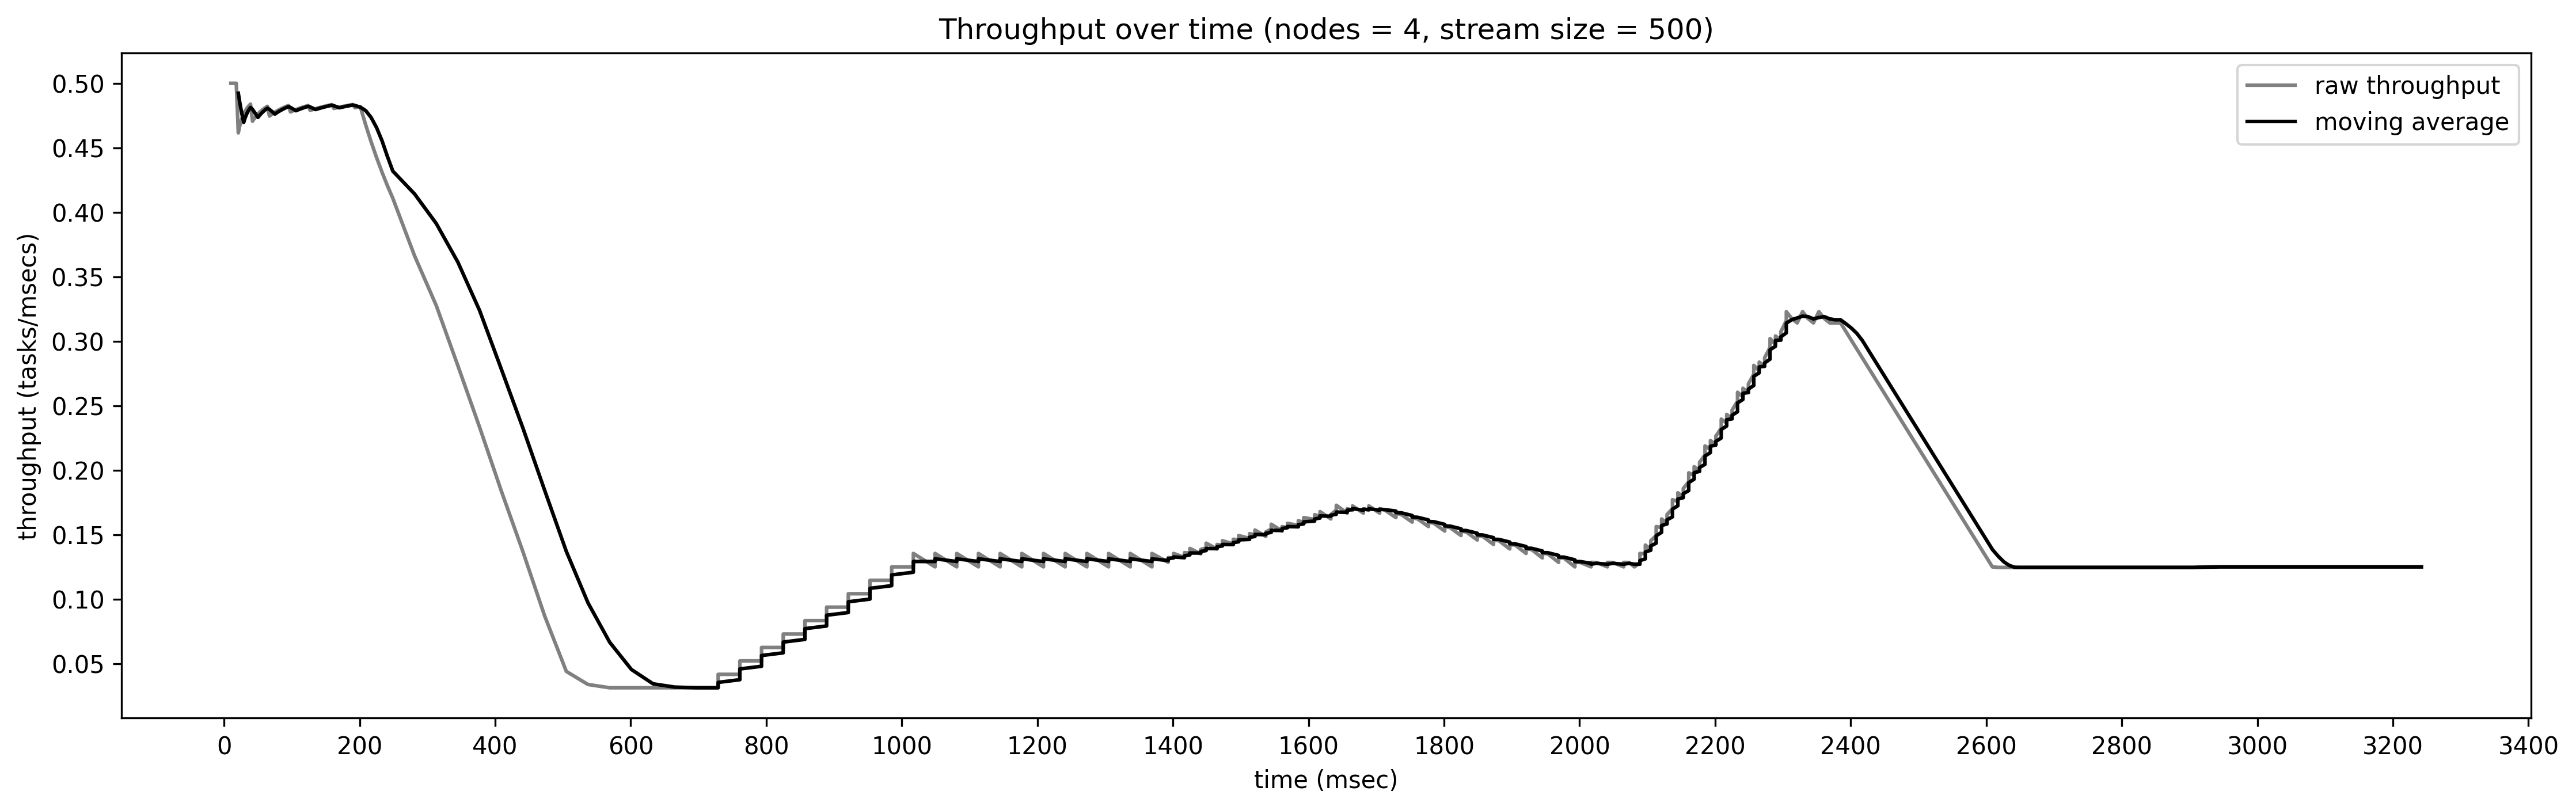

In [5]:
title = f'Throughput over time (workers = {df_throughput_pts["numworkers"][0]}, stream size = {df_throughput_pts["streamsize"][0]})'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
plt.locator_params(axis='x', nbins=30) 
plt.locator_params(axis='y', nbins=16) 
df_throughput_pts.plot(ax=axs, x="time", y="throughput", color="grey", title=title, label="raw throughput")
df_throughput.plot(ax=axs, x="time", y="throughput", color="black", title=title, label="moving average")

axs.set_xlabel("time (msec)")
axs.set_ylabel("throughput (tasks/msecs)")

plt.show()

In [6]:
df_arrival = read_csv("arrival_time-*.csv")
df_arrival.insert(0, 'count', range(1, 1 + len(df_arrival)))
df_arrival.head()

Reading file ../csv/arrival_time-4-500.csv


,count,time,numworkers,streamsize
0,1,0,4,500
1,2,2,4,500
2,3,4,4,500
3,4,6,4,500
4,5,8,4,500


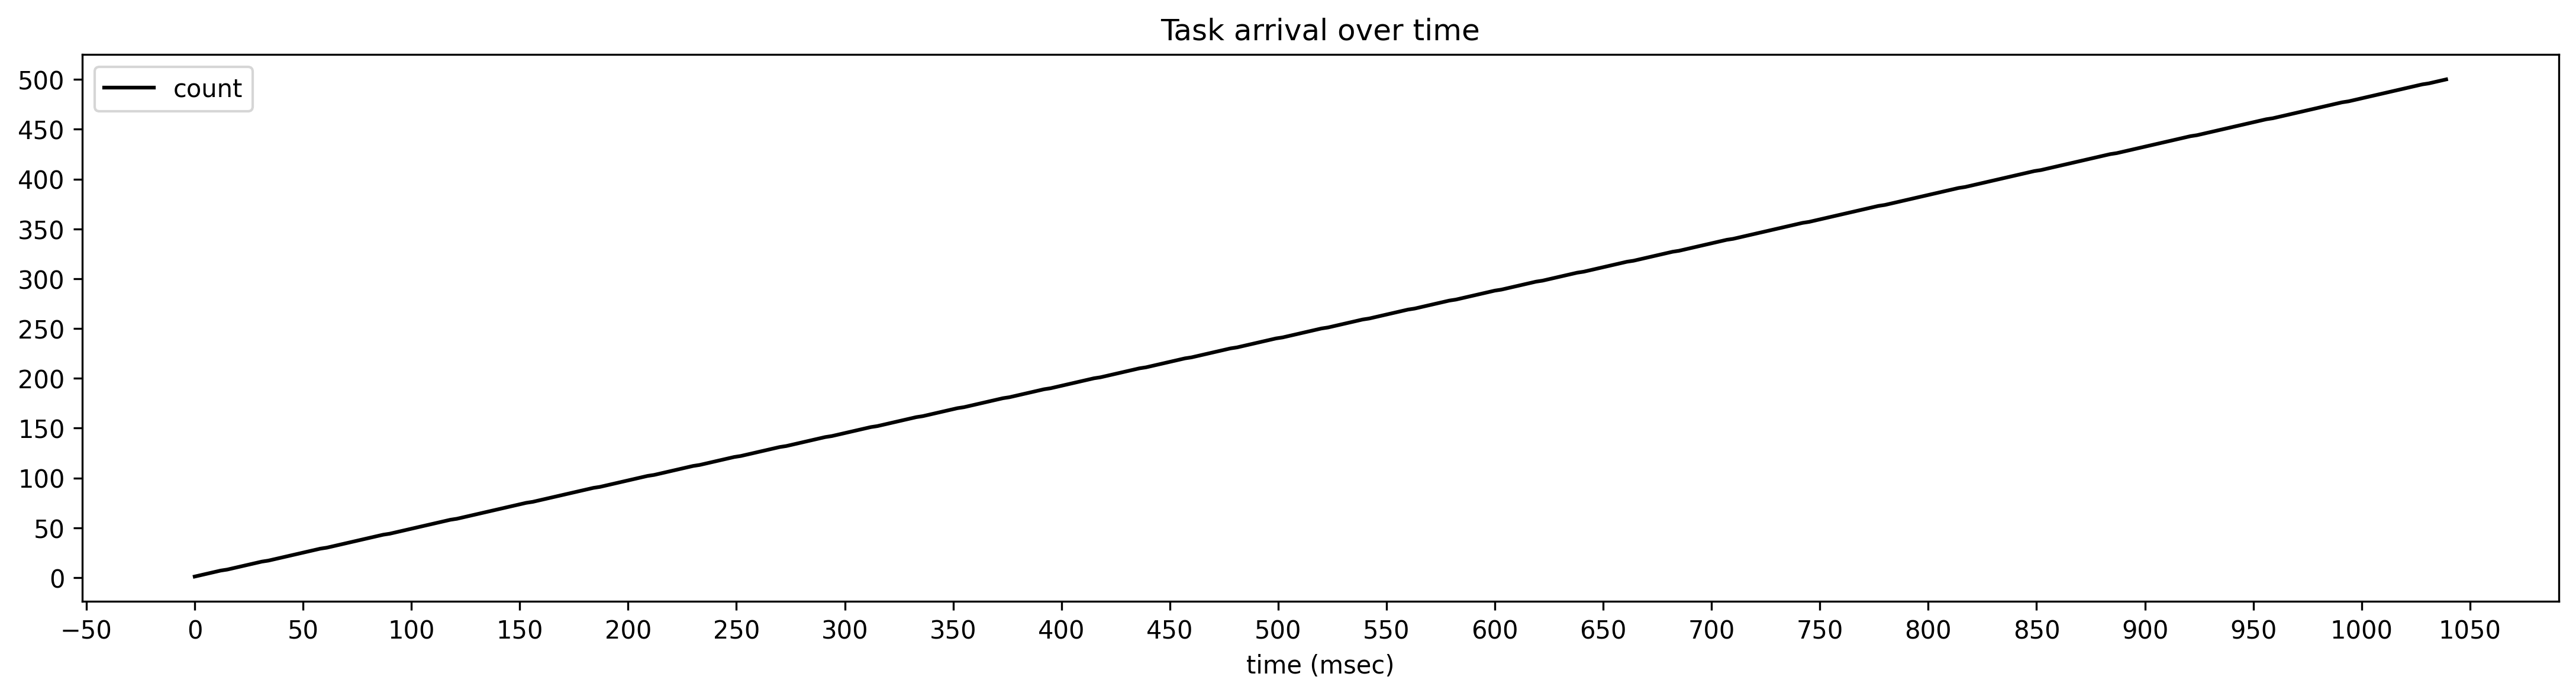

In [7]:

fig, axs = plt.subplots(figsize=(18, 4),dpi=300)
df_arrival.plot(ax=axs, x="time", y="count", color="black", title="Task arrival over time")
axs.set_xlabel("time (msec)")

# Setting the number of ticks
plt.locator_params(axis='x', nbins=25) 
plt.locator_params(axis='y', nbins=16) 
plt.show()

In [8]:
df_servicetime = read_csv("service_time-*.csv")
df_servicetime.describe()

Reading file ../csv/service_time-4-500.csv


,servicetime,time,numworkers,streamsize
count,494.000000,494.000000,494.0,494.0
mean,6.541312,1596.060729,4.0,500.0
std,4.590602,965.246461,0.0,0.0
min,2.033330,21.000000,4.0,500.0
25%,3.467980,833.000000,4.0,500.0
50%,6.524180,1721.000000,4.0,500.0
75%,7.872550,2289.000000,4.0,500.0
max,32.000000,3242.000000,4.0,500.0


In [9]:
df_servicetime_pts = read_csv("service_time_points-*.csv")
df_servicetime_pts.drop(index=df_servicetime_pts.index[:4], axis=0, inplace=True)
df_servicetime_pts.describe()

Reading file ../csv/service_time_points-4-500.csv


,servicetime,time,numworkers,streamsize
count,495.00000,495.000000,495.0,495.0
mean,6.55638,1592.872727,4.0,500.0
std,4.66489,966.874116,0.0,0.0
min,2.00000,18.000000,4.0,500.0
25%,3.50308,825.000000,4.0,500.0
50%,6.54545,1713.000000,4.0,500.0
75%,8.00000,2289.000000,4.0,500.0
max,32.00000,3242.000000,4.0,500.0


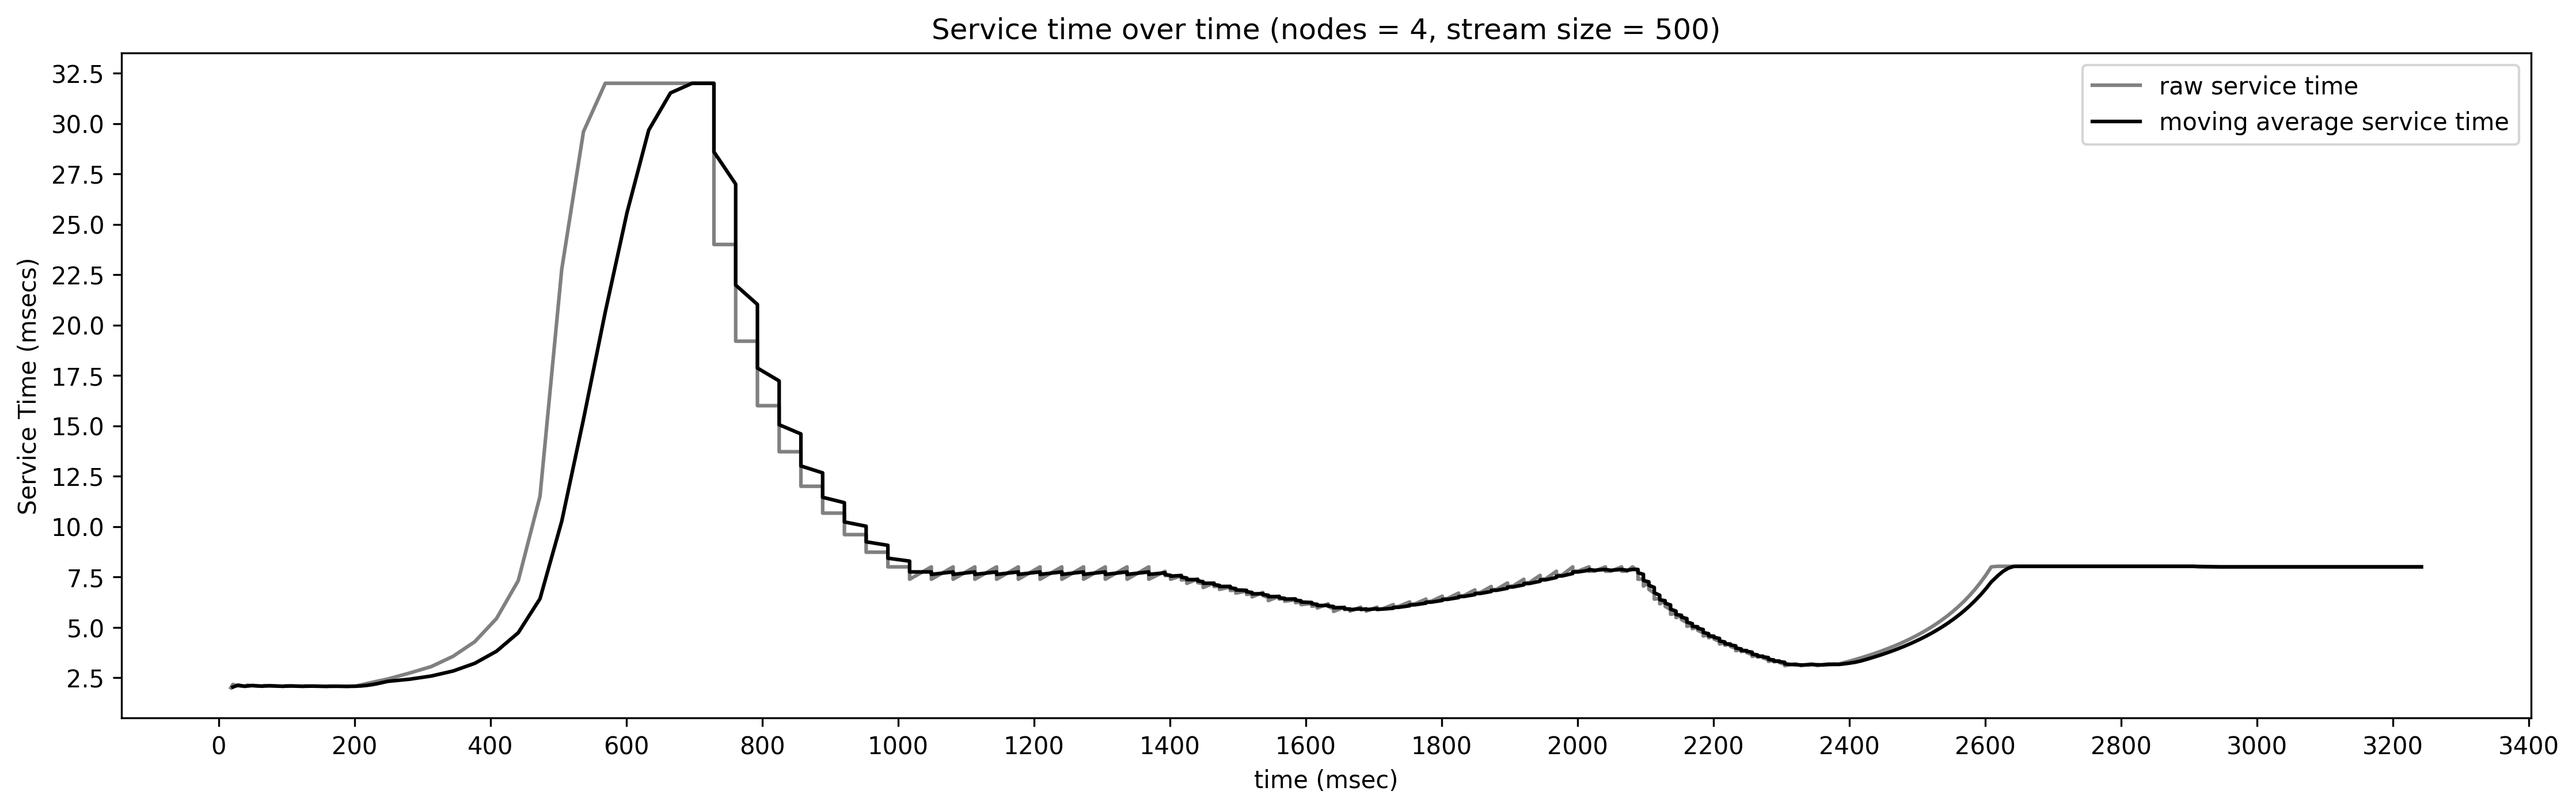

In [10]:
title = f'Service time over time (workers = {df_servicetime["numworkers"][0]}, stream size = {df_servicetime["streamsize"][0]})'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
df_servicetime_pts.plot(ax=axs, x="time", y="servicetime", color="grey", title=title, label="raw service time")
df_servicetime.plot(ax=axs, x="time", y="servicetime", color="black", title=title, label="moving average service time")

axs.set_xlabel("time (msec)")
axs.set_ylabel("Service Time (msecs)")

# Setting the number of ticks
plt.locator_params(axis='x', nbins=25) 
plt.locator_params(axis='y', nbins=14) 
plt.show()

In [11]:
df_num_workers = read_csv("num_workers-*.csv")
last_timestamp = df_servicetime_pts['time'].iloc[-1]
last_row = list(df_num_workers.iloc[-1])
df_num_workers = pd.concat([df_num_workers, pd.DataFrame([last_row], columns=df_num_workers.columns)], ignore_index=True)
df_num_workers.at[df_num_workers.index[-1],'time'] = df_servicetime_pts['time'].iloc[-1]
df_num_workers.head()

Reading file ../csv/atomic_num_workers-4-500.csv


,atomic_num_workers,time,numworkers,streamsize
0,4,0,4,500
1,1,193,4,500
2,4,697,4,500
3,3,1681,4,500
4,1,2297,4,500


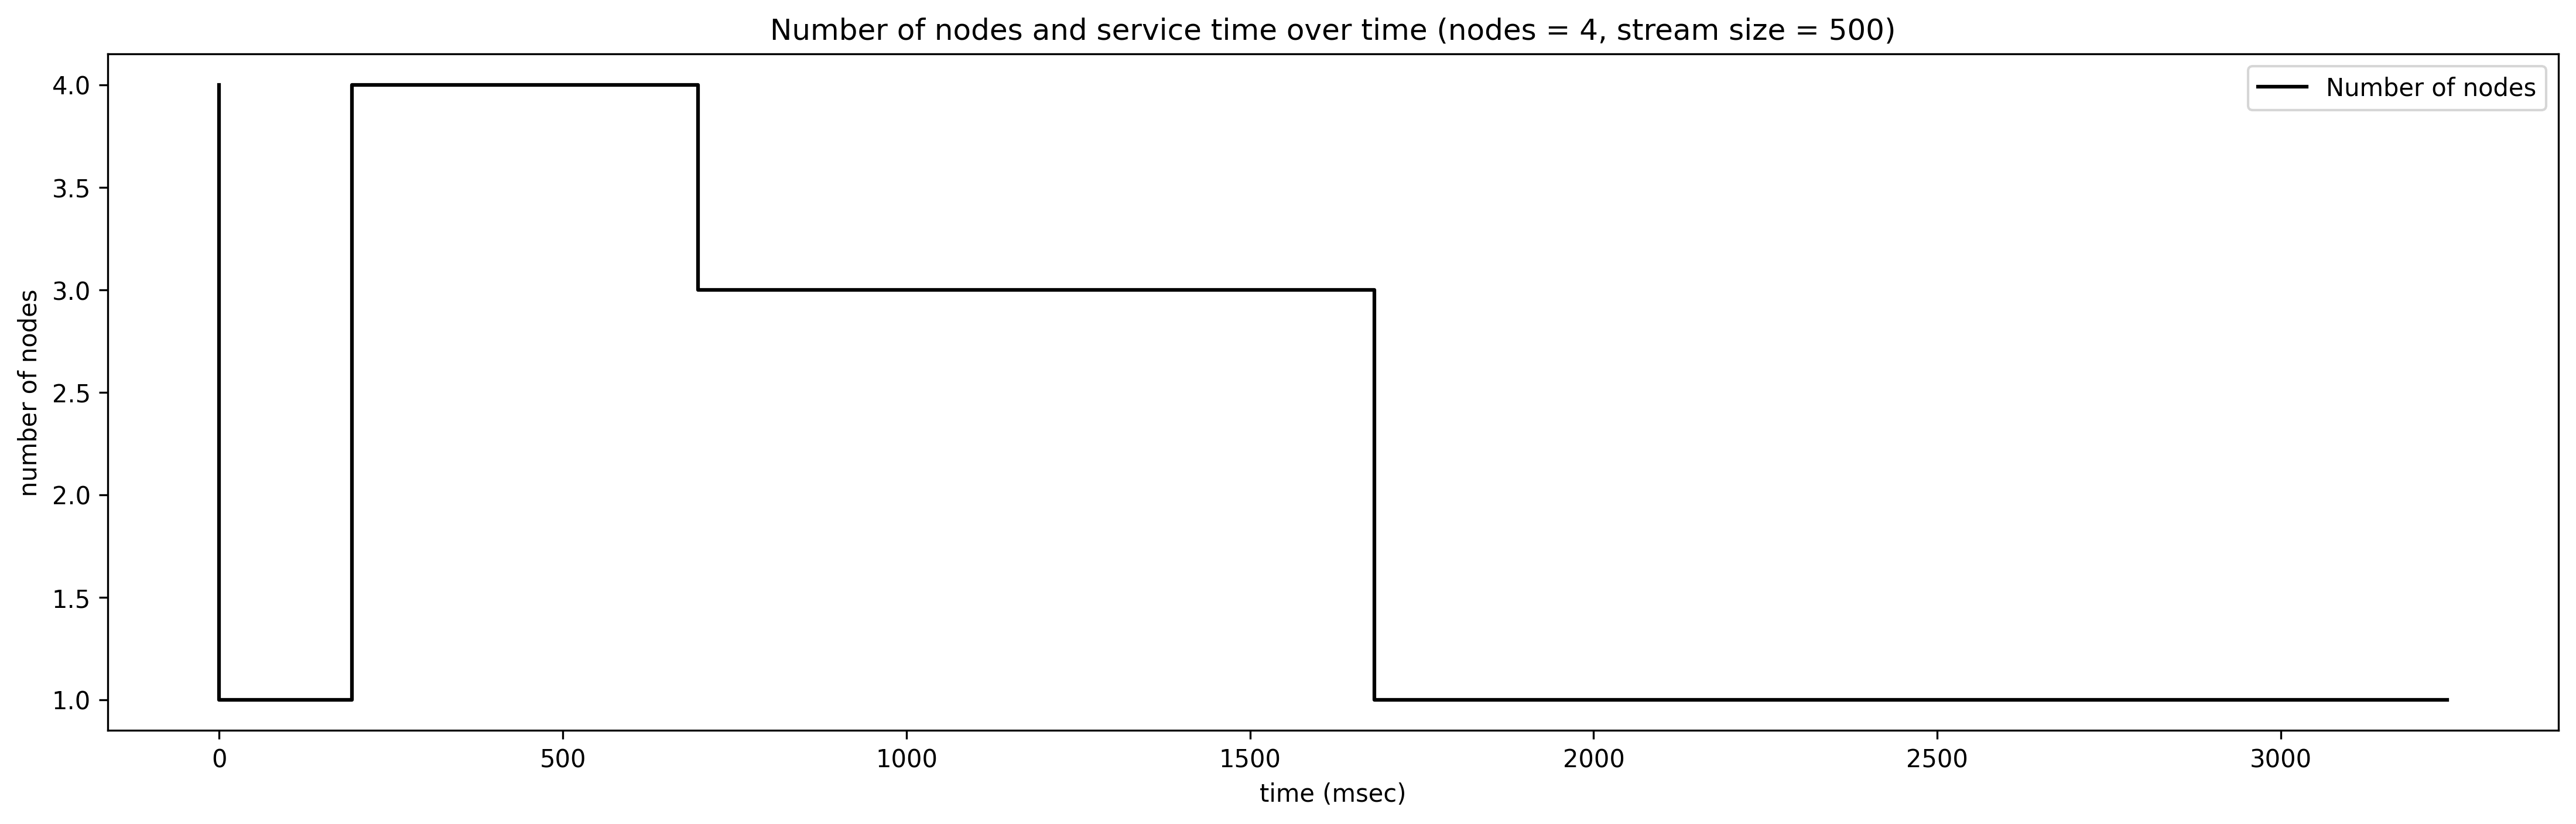

In [12]:
title = f'Number of workers and service time over time (workers = {df_num_workers["numworkers"][0]}, stream size = {df_num_workers["streamsize"][0]})'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
df_num_workers.plot(drawstyle="steps", ax=axs, x="time", y="num_workers", color="black", title=title, label="Number of workers")

axs.set_xlabel("time (msec)")
axs.set_ylabel("number of workers")

plt.show()

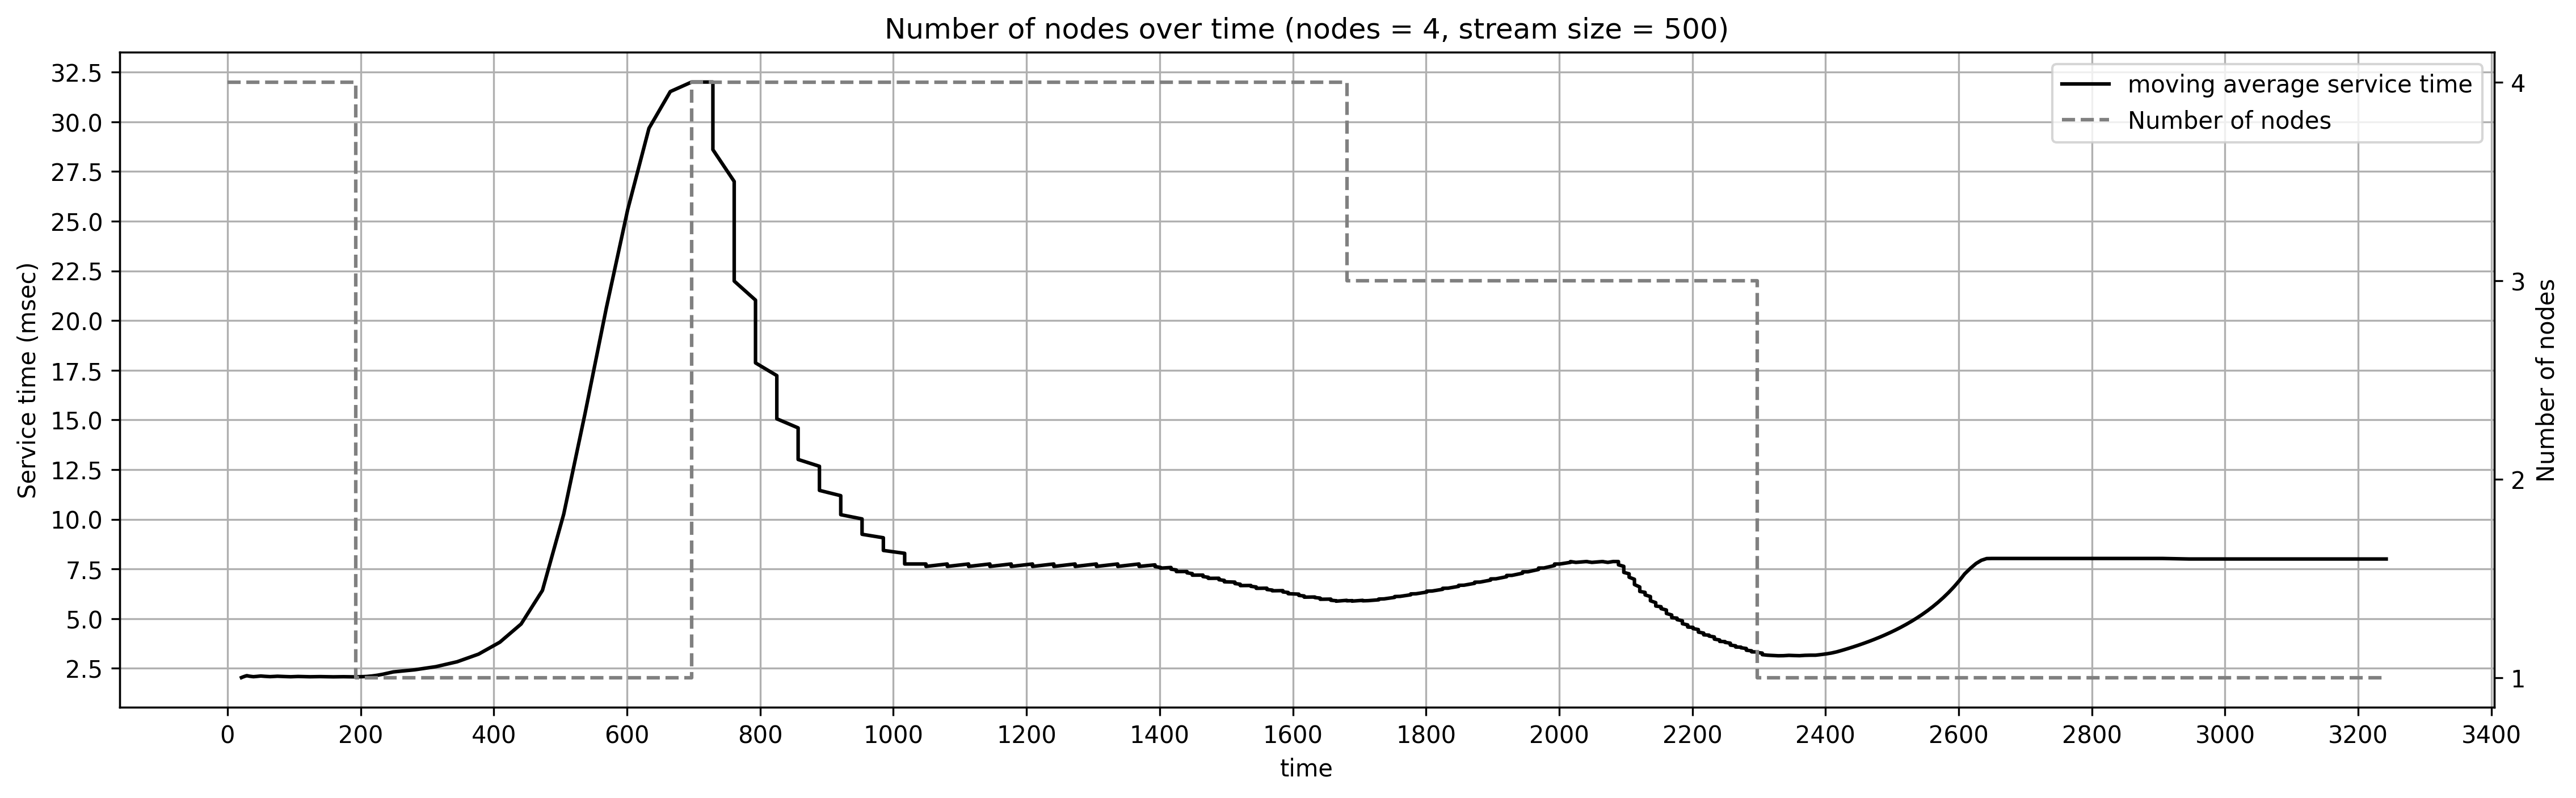

In [13]:
title = f'Number of workers over time (workers = {df_num_workers["numworkers"][0]}, stream size = {df_num_workers["streamsize"][0]})'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
ax2 = axs.twinx()

axs.set_xlabel("time (msec)")
axs.set_ylabel("Service time (msec)")
df_servicetime.plot(ax=axs, x="time", y="servicetime", color="black", title=title, label="moving average service time")

ax2.set_ylabel('Number of workers')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
df_num_workers.plot(drawstyle="steps-post", ax=ax2, x="time", y="num_workers", color="grey", label="Number of workers", linestyle='--')

axs.locator_params(axis='x', nbins=26) # Setting the number of ticks
axs.locator_params(axis='y', nbins=14) # Setting the number of ticks
ax2.locator_params(axis='y', nbins=24)
axs.grid()
h1, l1 = axs.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
axs.legend(h1+h2, l1+l2, loc=1)
ax2.get_legend().remove()

plt.show()